In [156]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.datasets import make_circles, make_classification, make_moons

In [157]:
#make_blobs(n_samples=500, centers=3, n_features=2,random_state=1, cluster_std = 2),

datasets = [
    make_blobs(n_samples=500, centers=2, n_features=2,random_state=1, cluster_std = 2),
    make_moons(n_samples=500, noise=0.1, random_state=1),
    make_circles(n_samples=500, noise=0.2, factor=0.5, random_state=1),
]

X, y = datasets[0]


print(y)

# One hot
y = [ [1 if val == 0 else 0, 1 if val == 1 else 0] for val in y]
Columns = ["Group 1","Group 2"]

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )


[1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0
 0 1 0 1 1 0 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 1
 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 0
 1 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1 1 1
 1 1 0 1 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1
 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0
 1 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1
 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 1
 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1
 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1 1
 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1
 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 0 0
 1 0 1 1 0 0 0 1 1 0 0 1 

In [158]:
print(y[0])

[0, 1]


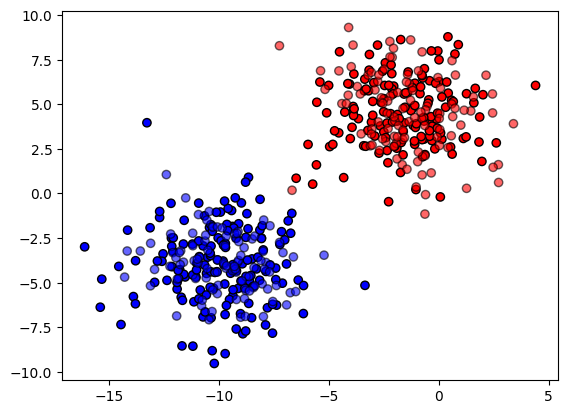

In [159]:
cm = plt.cm.bwr
# Plot initial points
plt.scatter(X_train[:, 0], X_train[:, 1], c=[i[0] for i in y_train] , cmap=cm, edgecolors="k")
    # Plot the testing points
plt.scatter(
        X_test[:, 0], X_test[:, 1], c=[i[0] for i in y_test], cmap=cm, alpha=0.6, edgecolors="k"
    )

In [160]:
classifier = MLPClassifier()
classifier.fit(X_train, y_train)

score = classifier.score(X_test, y_test)


c:\Users\Will Poulett\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [161]:
import random

# Get MUBA data
X_muba = []
y_muba = []
alphas = []

for X, label in zip(X_test, y_test):

    index = np.where(X_test == X)[0][0]
    label=np.array(label)

    for j in range(50):

        diff_label = False
        while diff_label == False:
            new_index = random.randint(0,len(X_test)-1)
            new_label = np.array(y_test[new_index])
            if new_label[0] != label[0]:
                diff_label = True

        new_X = X_test[new_index]
        
        alpha = random.random()
        
        X_combined = (alpha * X) + ((1-alpha) * new_X)
        y_combined = (alpha * label) + ((1-alpha) * new_label)
        
        X_muba.append(X_combined)
        y_muba.append(y_combined)
        alphas.append(y_combined[0])
    
X_muba = np.array(X_muba)
y_muba = np.array(y_muba)
# Alpha represents the percentage of Group 1



In [162]:
predictions = classifier.predict(X_muba)

In [163]:
incorrect_alphas = []

for pred, y, alpha in zip(predictions, y_muba, alphas):
    if pred[0] != round(y[0]): #incorrect
        incorrect_alphas.append(alpha)

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[0.025 0.075 0.125 0.175 0.225 0.275 0.325 0.375 0.425 0.475 0.525 0.575
 0.625 0.675 0.725 0.775 0.825 0.875 0.925 0.975]
[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]


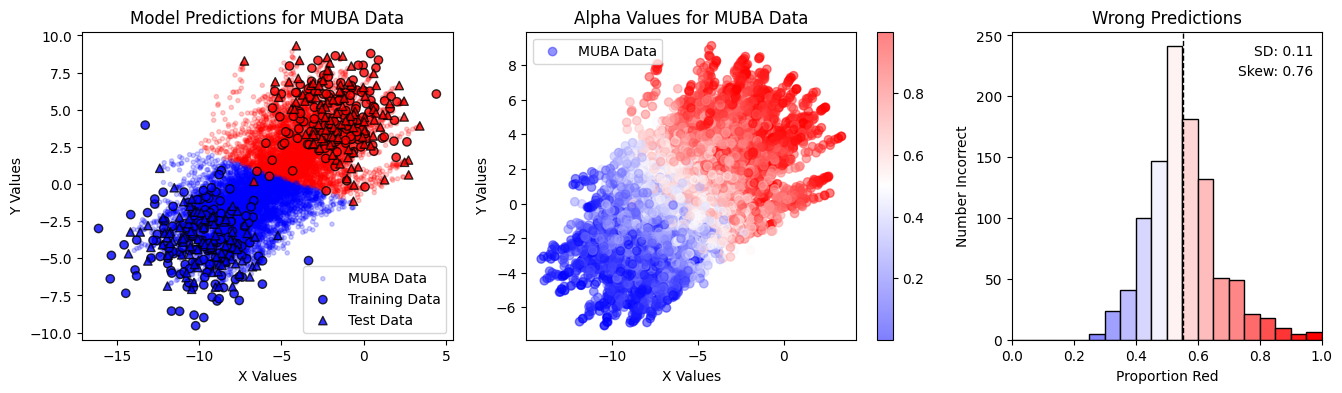

In [164]:
from scipy.stats import skew

cm = plt.cm.bwr

fig, axs = plt.subplots(nrows =1, ncols = 3, gridspec_kw={'width_ratios': [1.8, 2, 1.5]}, figsize = (16,4))

axs[0].scatter(X_muba[:, 0], X_muba[:, 1], c =  [i[0] for i in predictions], cmap = cm, alpha = 0.2, label = "MUBA Data", marker = '.')
axs[0].scatter(X_train[:, 0], X_train[:, 1], c = [i[0] for i in y_train], cmap = cm, alpha = 0.8, edgecolor = "black", label = "Training Data") 
axs[0].scatter(X_test[:, 0], X_test[:, 1], c = [i[0] for i in y_test], cmap = cm, alpha = 0.8, edgecolor = "black", label = "Test Data", marker = "^") # Red for Group 1
axs[0].legend()
axs[0].set_xlabel("X Values")
axs[0].set_ylabel("Y Values")
axs[0].set_title("Model Predictions for MUBA Data")

x = axs[1].scatter(X_muba[:, 0], X_muba[:, 1], c = alphas, alpha = 0.5, label = "MUBA Data", cmap = cm)
axs[1].set_xlabel("X Values")
axs[1].set_ylabel("Y Values")
axs[1].legend()
fig.colorbar(x)
axs[1].set_title("Alpha Values for MUBA Data")


n, bins, patches = axs[2].hist(incorrect_alphas,bins=[i * 0.05 for i in range(21)], edgecolor = "k")
axs[2].set_xlim(0,1)
axs[2].set_xlabel("Proportion Red")
axs[2].set_ylabel("Number Incorrect")
axs[2].set_title("Wrong Predictions")
axs[2].axvline(np.mean(incorrect_alphas), color='k', linestyle='dashed', linewidth=1)
axs[2].text(0.895,0.82,f"SD: {round(np.std(incorrect_alphas),2)}",transform=plt.gcf().transFigure, horizontalalignment = "right")
axs[2].text(0.895,0.77,f"Skew: {round(skew(incorrect_alphas),2)}",transform=plt.gcf().transFigure, horizontalalignment = "right")

print(bins)
# scale values to interval [0,1]
bin_centers = 0.5 * (bins[:-1] + bins[1:])
print(bin_centers)
col = bin_centers - min(bin_centers)
col /= max(col)
print(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))